In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import scipy.interpolate

# UNITS
ev2au = 1/27.211396132
au2ev = 27.211396132
ang2au = 1/0.529177249
au2ang = 0.529177249
au2fs = 1/41.34137333656
fs2au = 41.34137333656
au2debye = 1/0.39343
debye2au = 0.39343
au2nm = 0.052917720859
nm2au = 1/0.052917720859
au2cm1 = 2.1947463137E5
cm12au = 1/(2.1947463137E5)
au2amu = 1/1822.88848325
amu2au = 1822.88848325
thz2au = 1.0/0.029979/au2cm1

In [3]:
#La suma debe ser una suma de 32 terminos

coeff_matrix = np.zeros((32,4))
coeff_matrix[0,:] = [0,0,1,32849.58]
coeff_matrix[1,:] = [0,1,1,-17553.99]
coeff_matrix[2,:] = [1,0,1,-27625.23]
coeff_matrix[3,:] = [2,0,0,50043.09]
coeff_matrix[4,:] = [4,0,0,336.49]
coeff_matrix[5,:] = [0,1,2,-3360.94]
coeff_matrix[6,:] = [0,3,0,-64.84]
coeff_matrix[7,:] = [1,1,1,18285.40]
coeff_matrix[8,:] = [2,0,1,-7181.44]
coeff_matrix[9,:] = [0,0,4,2553.25]
coeff_matrix[10,:] = [0,2,2,-4905.39]
coeff_matrix[11,:] = [0,4,0,3505.21]
coeff_matrix[12,:] = [1,1,2,-21845.86]
coeff_matrix[13,:] = [1,3,0,-1416.44]
coeff_matrix[14,:] = [2,1,1,5596.86]
coeff_matrix[15,:] = [3,0,1,-142.39]
coeff_matrix[16,:] = [0,0,2,15623.64]
coeff_matrix[17,:] = [0,2,0,72972.84]
coeff_matrix[18,:] = [1,1,0,9857.17]
coeff_matrix[19,:] = [3,0,0,-2376.30]
coeff_matrix[20,:] = [0,2,1,-8550.95]
coeff_matrix[21,:] = [1,0,2,-4597.25]
coeff_matrix[22,:] = [1,2,0,-657.28]
coeff_matrix[23,:] = [2,1,0,1985.36]
coeff_matrix[24,:] = [0,1,3,-5546.12]
coeff_matrix[25,:] = [0,3,1,-11098.50]
coeff_matrix[26,:] = [1,0,3,-9178.03]
coeff_matrix[27,:] = [1,2,1,948.74]
coeff_matrix[28,:] = [2,0,2,-983.04]
coeff_matrix[29,:] = [2,2,0,-584.78]
coeff_matrix[30,:] = [3,1,0,1694.77]
coeff_matrix[31,:] = [0,0,3,4971.79]

def V(R1,R2,theta):
    R1e = 1.5614*ang2au #Amstrong C-S bond; R1e: Equilibrium value of R1
    R2e = 1.1562*ang2au #Amstrong C-O bond; R2e: Equilibrium value of R2
    alpha_1 = 1.95/ang2au #Amstrong^-1
    alpha_2 = 2.34/ang2au #Amstrong^-1
    theta_e = np.pi #90 Degrees

    aR1 = -alpha_1*(R1-R1e)
    aR2 = -alpha_2*(R2-R2e)

    y_1 = 1.0 - np.exp(aR1)
    y_2 = 1.0 - np.exp(aR2)
    y_3 = np.cos(theta) - np.cos(theta_e)

    suma = 0.0
    for i in range(32):
        suma = suma + (coeff_matrix[i,3]*cm12au)*(y_1**int(coeff_matrix[i,0]))*(y_2**int(coeff_matrix[i,1]))*(y_3**(coeff_matrix[i,2]))
    return(suma)

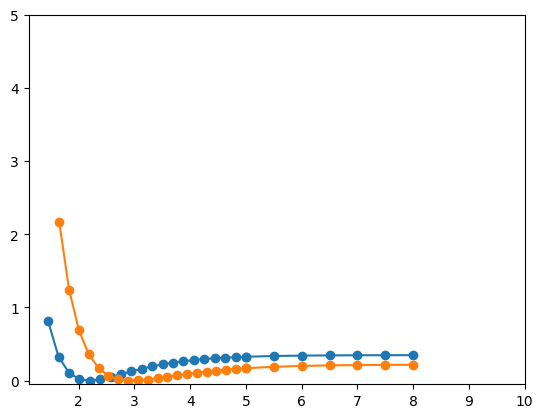

In [4]:
q1 = np.concatenate((np.linspace(1.45,5.0,20),np.linspace(5.0, 8, 7)))
q2 = np.concatenate((np.linspace(1.65,5.0,20),np.linspace(5.0, 8, 7)))
R1_eq = 1.5614*ang2au #Amstrong C-S bond; R1e: Equilibrium value of R1
R2_eq = 1.1562*ang2au #Amstrong C-O bond; R2e: Equilibrium value of R2
theta_eq = np.pi
plt.plot(q1, V(R1_eq,q1,theta_eq), "o-") #Blue
plt.plot(q2, V(q2,R2_eq,theta_eq), "o-") #Orange
plt.axis([1.1,10,-0.05,5])
plt.show()
#Iniciar desde el tercer punto de naranjo. max no varia
#Debe dar un comportamiento como la grafica
#Probar ambos modelos y comparar

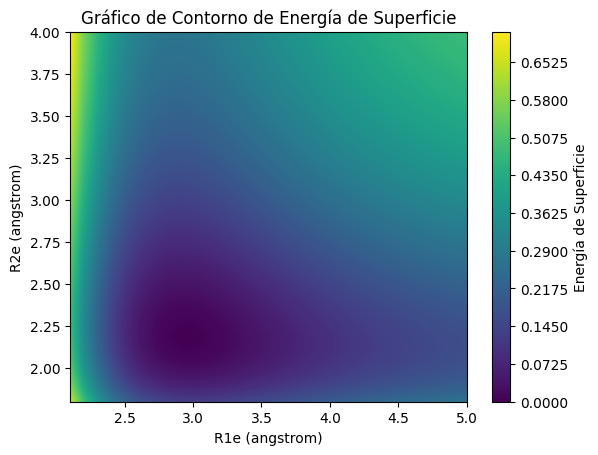

In [5]:
R1e_values = np.linspace(2.1, 5, 29)
R2e_values = np.linspace(1.8, 4, 29) 

R1e, R2e = np.meshgrid(R1e_values, R2e_values)
energia_superficie = np.vectorize(V)(R1e, R2e, np.pi) #np.vectorize para aplicar la función a matrices

plt.contourf(R1e, R2e, energia_superficie,300) #Contourf plot
plt.colorbar(label='Energía de Superficie')

plt.xlabel('R1e (angstrom)')
plt.ylabel('R2e (angstrom)')
plt.title('Gráfico de Contorno de Energía de Superficie')
plt.show()


In [6]:
# Generacion del archivo de datos
data_set = np.zeros((len(q1)**2,3)) #Dim(900,3)
l = 0 #Inicializa en 0
for i in range(len(q1)): #R1
    for j in range(len(q2)): #R2
        data_set[l,:] = q1[i],q2[j],V(q1[i],q2[j],np.pi) #Obtenemos valores para R1, R2 y V(R1,R2)
        l = l + 1 #Counter

df = pd.DataFrame(data_set)
df.to_csv('PotencialOCS_2.csv')
df.columns = ['R1','R2','V'] #Renombramos las columnas
df #Generamos el dataframe

,R1,R2,V
0,1.45,1.650000,4.639993
1,1.45,1.826316,4.304211
2,1.45,2.002632,4.097276
3,1.45,2.178947,3.971065
4,1.45,2.355263,3.896435
...,...,...,...
724,8.00,6.000000,0.607018
725,8.00,6.500000,0.610105
726,8.00,7.000000,0.611772
727,8.00,7.500000,0.612672


In [8]:
#Creamos los inputs para el training
inputsmodel = df.drop('V', axis=1)
inputsmodel
#R2 desde 1.6. primer punto del potencial menor a 2.

,R1,R2
0,1.45,1.650000
1,1.45,1.826316
2,1.45,2.002632
3,1.45,2.178947
4,1.45,2.355263
...,...,...
724,8.00,6.000000
725,8.00,6.500000
726,8.00,7.000000
727,8.00,7.500000


In [15]:
#Creamos el target para el training
target = df.iloc[:,-1]
target

0      4.639993
1      4.304211
2      4.097276
3      3.971065
4      3.896435
         ...   
724    0.607018
725    0.610105
726    0.611772
727    0.612672
728    0.613156
Name: V, Length: 729, dtype: float64

In [16]:
print("El punto minimo del target es: ",min(target))
print("El punto maximo del target es: ",max(target))

El punto minimo del target es:  2.867907566328938e-05
El punto maximo del target es:  4.639993022683583


In [24]:
#Functional API
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
import keras.optimizers
from keras.layers import Dense, Input
tf.random.set_seed(5)


ep = 1000
pv = 0.2
opt = keras.optimizers.RMSprop(learning_rate=0.003)

#Inputs
inputs = Input(shape=(2,))

#Hidden
hidden1 = Dense(64, activation='relu')(inputs)
hidden2 = Dense(90, activation='relu')(hidden1)
hidden3 = Dense(90, activation='relu')(hidden2)
hidden4 = Dense(90, activation='relu')(hidden3)
hidden5 = Dense(90, activation='relu')(hidden4)
hidden6 = Dense(90, activation='relu')(hidden5)
hidden7 = Dense(64, activation='relu')(hidden6)

#Output
output = Dense(1, activation='linear')(hidden6)

#Model and Compiler
model = Model(inputs=inputs, outputs=output)
model.compile(optimizer=opt, loss='mae', metrics=['mape','mse'])

model.fit(inputsmodel, target, epochs=ep, validation_split=pv, batch_size=240)

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 1.4042 - mape: 994.3889 - mse: 4.8754 - val_loss: 0.7135 - val_mape: 162.5102 - val_mse: 0.5316
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6326 - mape: 1365.0886 - mse: 0.9367 - val_loss: 0.1713 - val_mape: 33.1878 - val_mse: 0.0360
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4573 - mape: 1309.1478 - mse: 0.9501 - val_loss: 0.1595 - val_mape: 39.5363 - val_mse: 0.0314
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4504 - mape: 2865.8997 - mse: 0.8449 - val_loss: 0.1218 - val_mape: 25.1116 - val_mse: 0.0184
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3954 - mape: 684.2303 - mse: 0.8083 - val_loss: 0.0811 - val_mape: 20.3103 - val_mse: 0.0082
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3833 - mape: 2102.2983 - mse: 0.7622 - val_loss: 0.1300 - val_mape: 26.3253 - val_mse: 0.0209
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4130 - map

In [25]:
#Predecimos datos de Potencial en base a los datos de testing
y_pred = model.predict(inputsmodel)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


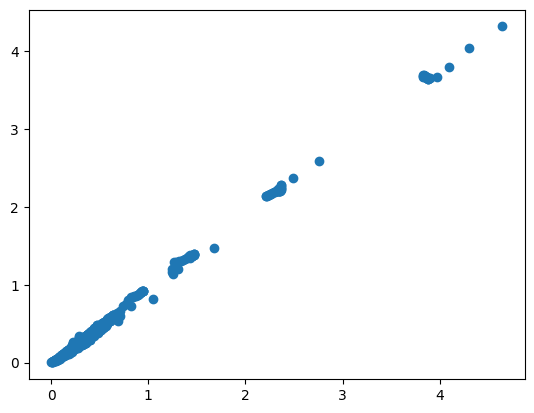

In [26]:
plt.plot(df.V,y_pred,'o')

In [27]:
datos = model.predict_on_batch(inputsmodel) #EStudiar esto
aa= datos.tolist()
lista = []
for i in range(len(aa)):
    lista.append(aa[i][0])
df1 = pd.DataFrame()
df1['predicted'] = lista
df1

,predicted
0,4.313400
1,4.034696
2,3.793247
3,3.663825
4,3.655023
...,...
724,0.550312
725,0.554418
726,0.556976
727,0.558993


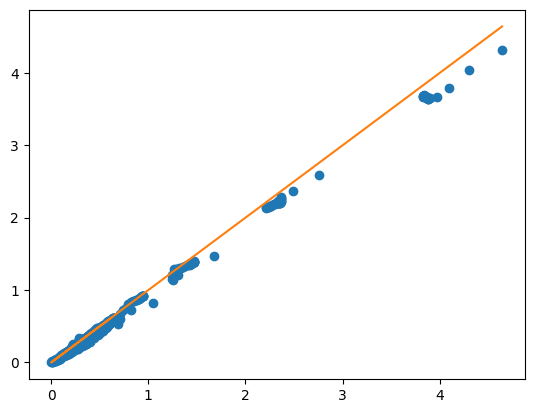

In [28]:
plt.plot(df['V'], df1['predicted'],'o')
plt.plot(df['V'], df['V'])

In [28]:
# Recursos de utilidad
#https://wandb.ai/ayush-thakur/dl-question-bank/reports/Input-Keras-Layer-Explanation-With-Code-Samples--VmlldzoyMDIzMDU#:~:text=a%20certain%20way.-,What%20Is%20Dim%20In%20A%20Keras%20Layer%3F,tensor%20like%20(3%2C).

